## Unit 12—Tales from the Crypto

 **News Headlines Sentiment**

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. Use descriptive statistics to answer the following questions:
Which coin had the highest mean positive score?
Which coin had the highest negative score?
Which coin had the highest positive score?

In [35]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [36]:
# Initial imports
import os
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
%matplotlib inline
from newsapi import NewsApiClient
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from collections import Counter
from nltk import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import spacy
import en_core_web_sm
from spacy import displacy
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\fryte\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fryte\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fryte\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fryte\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [37]:
 # Read your api key environment variable
# for env API keys
from dotenv import load_dotenv
load_dotenv()
api_key = os.getenv("news_api")

In [38]:
 # Create a newsapi client
newsapi = NewsApiClient(api_key=os.environ["news_api"])

In [39]:
# Fetch the Bitcoin news articles
# dow jones news
bitcoinheadlines = newsapi.get_everything(
    q='bitcoin',
    language='en',
    sort_by='relevancy'
)

In [40]:
ethereumheadlines = newsapi.get_everything(
    q='ethereum',
    language='en',
    sort_by='relevancy'
)

In [41]:
btc_sentiments = []

for articles in bitcoinheadlines['articles']:
    try:
        text = articles['content']
        results = analyzer.polarity_scores(text)
        compound = results['compound']
        pos = results['pos']
        neu = results['neu']
        neg = results['neg'] 

        #put data into sentiments
        btc_sentiments.append({
            'text':text,
            'Compound':compound,
            'Positive':pos,
            'Negative':neg,
            'Neutral':neu})

    except AttributeError:
        pass

btc = pd.DataFrame(btc_sentiments)
btc.head()

,text,Compound,Positive,Negative,Neutral
0,The government of India is considering an 18% ...,-0.2924,0.000,0.059,0.941
1,Just weeks after it shattered its yearslong as...,0.3612,0.171,0.080,0.749
2,"When Mt. Gox went bankrupt in 2014, it was the...",-0.5574,0.000,0.096,0.904
3,Ban reflects Twitters failure to promote healt...,-0.3818,0.135,0.176,0.689
4,New York (CNN Business)Bitcoin has been flirti...,0.5719,0.132,0.000,0.868


In [42]:
eth_sentiments = []

for articles in ethereumheadlines['articles']:
    try:
        text = articles['content']
        results = analyzer.polarity_scores(text)
        compound = results['compound']
        pos = results['pos']
        neu = results['neu']
        neg = results['neg'] 

        #put data into sentiments
        eth_sentiments.append({
            'text':text,
            'Compound':compound,
            'Positive':pos,
            'Negative':neg,
            'Neutral':neu})

    except AttributeError:
        pass

eth = pd.DataFrame(eth_sentiments)
eth.head()

,text,Compound,Positive,Negative,Neutral
0,Cryptocurrencies stole headlines on the first ...,0.3412,0.074,0.00,0.926
1,Ethereum creator Vitalik Buterin.\r\n14 with 1...,0.5256,0.099,0.00,0.901
2,Bitcoin fizzled in Monday trading as the famou...,-0.2732,0.000,0.06,0.940
3,By Reuters Staff\r\nFILE PHOTO: A representati...,0.0000,0.000,0.00,1.000
4,By Reuters Staff\r\nFILE PHOTO: A representati...,0.0000,0.000,0.00,1.000


In [46]:
# Create the Bitcoin sentiment scores DataFrame
#summary stats
print("Bitcoin Desciption")
display(btc.describe())
print("Eth Desciption")
display(eth.describe())


Bitcoin Desciption


,Compound,Positive,Negative,Neutral
count,18.000000,18.000000,18.000000,18.000000
mean,0.246172,0.109222,0.039944,0.850944
std,0.437049,0.099140,0.055116,0.112382
min,-0.557400,0.000000,0.000000,0.647000
25%,0.000000,0.000000,0.000000,0.770750
50%,0.244600,0.133500,0.000000,0.859000
75%,0.611650,0.155500,0.067250,0.931750
max,0.921700,0.353000,0.176000,1.000000


Eth Desciption


,Compound,Positive,Negative,Neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.089084,0.031421,0.009789,0.958789
std,0.299285,0.056226,0.023273,0.055260
min,-0.381800,0.000000,0.000000,0.845000
25%,0.000000,0.000000,0.000000,0.929500
50%,0.000000,0.000000,0.000000,1.000000
75%,0.170600,0.037000,0.000000,1.000000
max,0.636900,0.155000,0.067000,1.000000


In [ ]:
 # Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!

In [ ]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!

In [ ]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!

 Questions:
Q: Which coin had the highest mean positive score?A: Q: Which coin had the highest compound score?A: Q. Which coin had the highest positive score?A:

**Tokenizer**

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
Lowercase each word
Remove Punctuation
Remove Stopwords

In [9]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [10]:
# Expand the default stopwords list if necessary
#tokenization
wnl = WordNetLemmatizer()

stop = stopwords.words('english')

stop.append('``')
stop.append('\'')
stop.append('...')
stop = set(stop)

In [11]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    words = word_tokenize(text)
    words = list(filter(lambda w: w.lower(), words))
    words = list(filter(lambda t: t not in punctuation, words))
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    tokens = [wnl.lemmatize(word) for word in words]
    return tokens

In [47]:
 # Create a new tokens column for bitcoin
btc['tokens'] = btc.text.apply(tokenizer)
btc.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,The government of India is considering an 18% ...,-0.2924,0.000,0.059,0.941,"[government, India, considering, 18, tax, bitc..."
1,Just weeks after it shattered its yearslong as...,0.3612,0.171,0.080,0.749,"[week, shattered, yearslong, aspiration, reach..."
2,"When Mt. Gox went bankrupt in 2014, it was the...",-0.5574,0.000,0.096,0.904,"[Mt, Gox, went, bankrupt, 2014, world, ’, larg..."
3,Ban reflects Twitters failure to promote healt...,-0.3818,0.135,0.176,0.689,"[Ban, reflects, Twitters, failure, promote, he..."
4,New York (CNN Business)Bitcoin has been flirti...,0.5719,0.132,0.000,0.868,"[New, York, CNN, Business, Bitcoin, flirting, ..."


In [48]:
# Create a new tokens column for ethereum
eth['tokens'] = eth.text.apply(tokenizer)
eth.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,Cryptocurrencies stole headlines on the first ...,0.3412,0.074,0.00,0.926,"[Cryptocurrencies, stole, headline, first, sto..."
1,Ethereum creator Vitalik Buterin.\r\n14 with 1...,0.5256,0.099,0.00,0.901,"[Ethereum, creator, Vitalik, Buterin, 14, 11, ..."
2,Bitcoin fizzled in Monday trading as the famou...,-0.2732,0.000,0.06,0.940,"[Bitcoin, fizzled, Monday, trading, famously, ..."
3,By Reuters Staff\r\nFILE PHOTO: A representati...,0.0000,0.000,0.00,1.000,"[Reuters, Staff, FILE, PHOTO, representation, ..."
4,By Reuters Staff\r\nFILE PHOTO: A representati...,0.0000,0.000,0.00,1.000,"[Reuters, Staff, FILE, PHOTO, representation, ..."


**NGrams and Frequency Analysis**

In this section you will look at the ngrams and word frequency for each coin. 
Use NLTK to produce the n-grams for N = 2. 
List the top 10 words for each coin.

In [15]:
from collections import Counter
from nltk import ngrams

In [49]:
# Generate the Bitcoin N-grams where N=2
#n-grams
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('Reuters', 'Bitcoin'), 5),
 (('popular', 'cryptocurrency'), 4),
 (('Bitcoin', 'Wednesday'), 4),
 (('Wednesday', 'hit'), 4),
 (('hit', 'record'), 3),
 (('record', '28,599.99'), 3),
 (('28,599.99', 'taking'), 3),
 (('taking', 'gain'), 3),
 (('gain', 'year'), 3),
 (('year', 'past'), 3),
 (('past', '295'), 3),
 (('world', 'popular'), 3),
 (('Jack', 'Dorsey'), 2),
 (('virtual', 'currency'), 2),
 (('char', 'Reuters'), 2),
 (('Reuters', 'Staff'), 2),
 (('Staff', 'LONDON'), 2),
 (('LONDON', 'Dec'), 2),
 (('Dec', '30'), 2),
 (('30', 'Reuters'), 2)]

In [50]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(eth.text.str.cat()), N)
Counter(grams).most_common(20)

[(('virtual', 'currency'), 10),
 (('char', 'Reuters'), 9),
 (('Reuters', 'Staff'), 9),
 (('Staff', 'FILE'), 9),
 (('FILE', 'PHOTO'), 9),
 (('illustration', 'taken'), 9),
 (('2020', 'REUTERS/Dado'), 7),
 (('currency', 'Bitcoin'), 6),
 (('PHOTO', 'representation'), 5),
 (('representation', 'virtual'), 5),
 (('REUTERS/Dado', 'Ruvic/Illustration'), 4),
 (('PHOTO', 'Representations'), 4),
 (('Representations', 'virtual'), 4),
 (('currency', 'bitcoin'), 3),
 (('bitcoin', 'seen'), 3),
 (('taken', 'November'), 3),
 (('November', '19'), 3),
 (('19', '2020'), 3),
 (('Reuters', 'Bitcoin'), 3),
 (('REUTERS/Dado', 'Ruvic'), 3)]

In [17]:
 # Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [51]:
# Get the top 10 words for Bitcoin
all_tokens = tokenizer(btc.text.str.cat())
token_count(all_tokens, 10)

[('char', 18),
 ('Bitcoin', 13),
 ('cryptocurrency', 7),
 ('Reuters', 7),
 ('world', 5),
 ('currency', 5),
 ('year', 5),
 ('LONDON', 5),
 ('record', 5),
 ('new', 4)]

In [52]:
# Get the top 10 words for Ethereum
all_tokens = tokenizer(eth.text.str.cat())
token_count(all_tokens, 10)

[('char', 19),
 ('Reuters', 16),
 ('currency', 13),
 ('taken', 12),
 ('Bitcoin', 11),
 ('virtual', 10),
 ('2020', 10),
 ('Staff', 9),
 ('FILE', 9),
 ('PHOTO', 9)]

**Word Clouds**

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [21]:
# Generate the Bitcoin word cloud
#Word Clouds
def wordcloud(text, title=''):
    df_cloud = WordCloud(width=500).generate(text)
    plt.imshow(df_cloud)
    plt.axis('off')
    plt.title(title)
    plt.show()

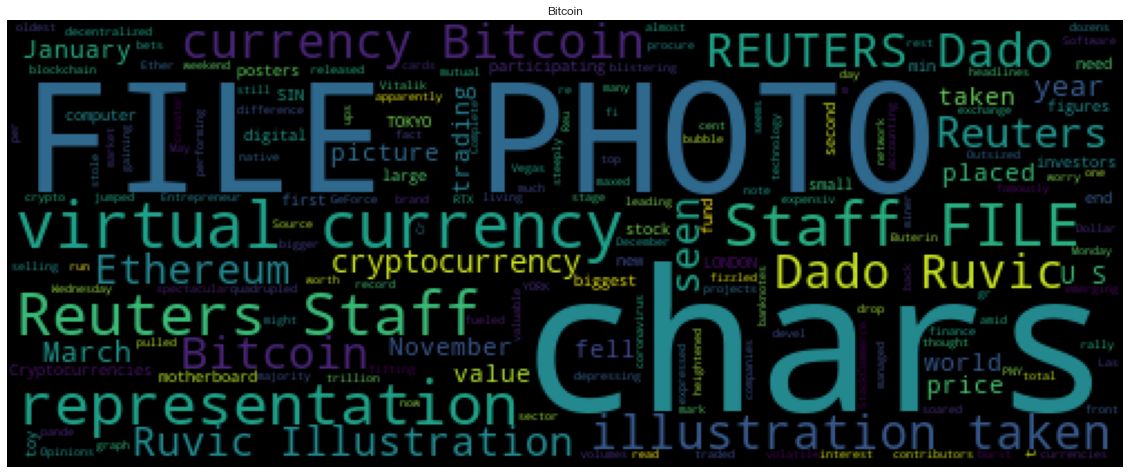

In [54]:
 # Generate the Ethereum word cloud
wordcloud(eth.text.str.cat(), title='Bitcoin')

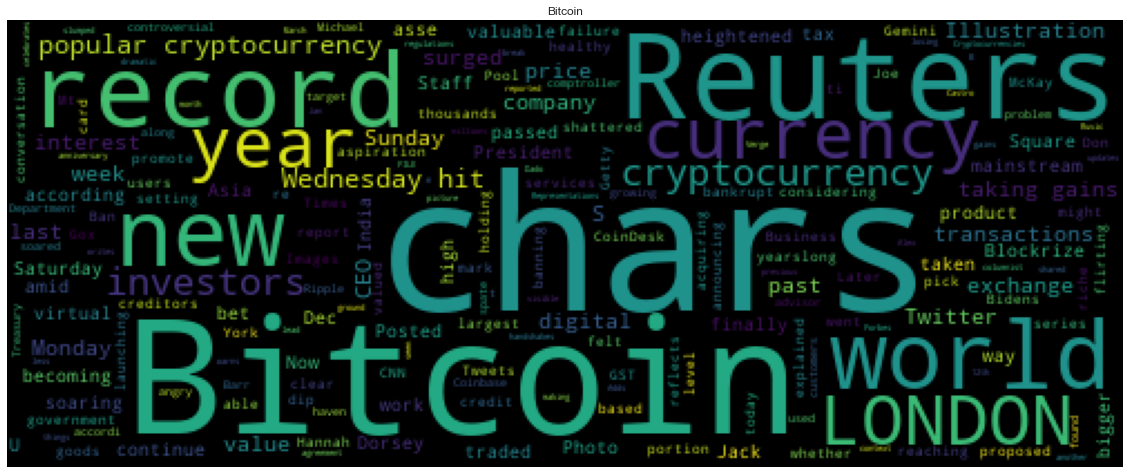

In [55]:
wordcloud(btc.text.str.cat(), title='Bitcoin')

**Named Entity Recognition**

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm
# Named Entity Recognition
nlp = en_core_web_sm.load()

In [26]:
 # Load the spaCy model
nlp = spacy.load('en_core_web_sm')

**Bitcoin NER**

In [57]:
# Concatenate all of the bitcoin text together
all_dow_text = btc.text.str.cat()
all_dow_text

"The government of India is considering an 18% tax on all bitcoin transactions, according to a new report from the Times of India. Its not clear whether the proposed goods and services tax (GST) would… [+1397 chars]Just weeks after it shattered its yearslong aspiration of reaching $20,000 in value, Bitcoin is at it again. On Saturday, the cryptocurrency passed $33,000 in value, according to CoinDesk, before dip… [+2123 chars]When Mt. Gox went bankrupt in 2014, it was the world’s largest Bitcoin exchange, holding 850,000 Bitcoins from thousands of users. Now, creditors might finally be able to get a portion of those riche… [+626 chars]Ban reflects Twitters failure to promote healthy conversation\r\nPhoto by Hannah McKay-Pool/Getty Images\r\nTwitter CEO Jack Dorsey, in a series of Tweets, explained that he felt banning US President Don… [+3185 chars]New York (CNN Business)Bitcoin has been flirting with the $30,000 mark for weeks, and finally passed that record-setting level Saturday. The

In [58]:
# Run the NER processor on all of the text
doc = nlp(all_dow_text)

# Add a title to the document
doc.user_data['title'] = 'Bitcoin Entity Recognition'

displacy.render(doc, style='ent', jupyter=True)

In [29]:
 # Render the visualization
# YOUR CODE HERE!

In [30]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

first ORDINAL
day of 2021 DATE
bitcoin GPE
the weekend DATE
Vitalik Buterin PERSON
14 CARDINAL
11 CARDINAL
Ethereum ORG
second ORDINAL
above $1,000 MONEY
Monday DATE
new-year DATE
as much as 17 CARDINAL
March DATE
Reuters ORG
November 19, 2020 DATE
REUTERS/Dado Ruvic/Illustration ORG
Reuters ORG
Bitcoin GPE
Reuters ORG
November 19, 2020 DATE
REUTERS/Dado Ruvic/Illustration ORG
Reuters ORG
Bitcoin GPE
Reuters ORG
Bitcoin GPE
January 7, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
SIN ORG
Reuters ORG
Bitcoin GPE
January 7, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
SIN ORG
2020 DATE
Las Vegas GPE
dozens CARDINAL
3080 CARDINAL
Reuters ORG
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Reuters ORG
9, 2021 DATE
7 min QUANTITY
2020 DATE
the year DATE
second ORDINAL
December 2020 DATE
first ORDINAL
Ethereum 2.0 ORG
Reuters ORG
Bitcoin GPE
Wednesday DATE
a record $28,599.99 MONEY
digital ORG
this year DATE
YORK PERSON
Reuters ORG
U.S. GPE
the years DATE
U.S. GPE
chars]1 CARDINAL
1 CARDINAL
more than $1 

**Ethereum NER**

In [60]:
# Concatenate all of the bitcoin text together
all_dow_text = eth.text.str.cat()
all_dow_text

"Cryptocurrencies stole headlines on the first stock-market trading day of 2021, with bitcoin and ethereum selling off steeply after blistering run-ups over the weekend.\r\nBut investors need not worry … [+2877 chars]Ethereum creator Vitalik Buterin.\r\n14 with 11 posters participating\r\nEther, the native currency of the Ethereum network and the second most valuable cryptocurrency, has soared above $1,000 for the fi… [+3015 chars]Bitcoin fizzled in Monday trading as the famously volatile cryptocurrency pulled back after a spectacular new-year rally.\r\nPrices fell as much as 17 per cent in the biggest drop since March before re… [+2174 chars]By Reuters Staff\r\nFILE PHOTO: A representation of virtual currency bitcoin is seen in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\r\nTOKYO (Reuters) - Bitcoin fell more t… [+293 chars]By Reuters Staff\r\nFILE PHOTO: A representation of virtual currency bitcoin is seen in this illustration taken November 19, 2020. R

In [62]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!
# Run the NER processor on all of the text
doc = nlp(all_dow_text)

# Add a title to the document
doc.user_data['title'] = 'Ethereum Entity Recognition'

 # Render the visualization
displacy.render(doc, style='ent', jupyter=True)

In [63]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

first ORDINAL
day of 2021 DATE
bitcoin GPE
the weekend DATE
Vitalik Buterin PERSON
14 CARDINAL
11 CARDINAL
Ethereum ORG
second ORDINAL
above $1,000 MONEY
Monday DATE
new-year DATE
as much as 17 CARDINAL
March DATE
Reuters ORG
November 19, 2020 DATE
REUTERS/Dado Ruvic/Illustration ORG
Reuters ORG
Bitcoin GPE
Reuters ORG
November 19, 2020 DATE
REUTERS/Dado Ruvic/Illustration ORG
Reuters ORG
Bitcoin GPE
Reuters ORG
Bitcoin GPE
January 7, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
SIN ORG
Reuters ORG
Bitcoin GPE
January 7, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
SIN ORG
2020 DATE
Las Vegas GPE
dozens CARDINAL
3080 CARDINAL
Reuters ORG
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Reuters ORG
9, 2021 DATE
7 min QUANTITY
2020 DATE
the year DATE
second ORDINAL
December 2020 DATE
first ORDINAL
Ethereum 2.0 ORG
Reuters ORG
Bitcoin GPE
Wednesday DATE
a record $28,599.99 MONEY
digital ORG
this year DATE
YORK PERSON
Reuters ORG
U.S. GPE
the years DATE
U.S. GPE
chars]1 CARDINAL
1 CARDINAL
more than $1 